# Ejercicio 3

### 3.1:
* Lectura de datos manual:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
data_1 = {
        'id': ['1', '2', '3', '4', '5'],
        'primer_nombre': ['Alex', 'Amy', 'Valentina', 'Alice', 'Lina'], 
        'apellido': ['Anderson', 'Ruales', 'Marin', 'Barbosa', 'Robles']}

data_2 = {
        'id': ['4', '5', '6', '7', '8'],
        'primer_nombre': ['Luis', 'Brian', 'Mariana', 'Marcela', 'Carlos'], 
        'apellido': ['Ruiz', 'Giralgo', 'Ortegon', 'Palacios', 'Gallego']}

data_3 = {
        'id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

* Asignarlos a 3 DF

In [102]:
df1 = pd.DataFrame(data_1)

df2 = pd.DataFrame(data_2)

df3 = pd.DataFrame(data_3)


* Unir 2 DF a lo largo de filas y asignar todos los datos.

In [20]:
df_concatenado = pd.concat([df1, df2], axis=1)
df_concatenado

id primer_nombre  apellido id primer_nombre  apellido
0  1          Alex  Anderson  4          Luis      Ruiz
1  2           Amy    Ruales  5         Brian   Giralgo
2  3     Valentina     Marin  6       Mariana   Ortegon
3  4         Alice   Barbosa  7       Marcela  Palacios
4  5          Lina    Robles  8        Carlos   Gallego

* Unir 2 DF a lo largo de columnas y asignar todos los datos de las columnas.

In [22]:
df_concatenado2 = pd.concat([df1, df2], axis=0)
df_concatenado2

id primer_nombre  apellido
0  1          Alex  Anderson
1  2           Amy    Ruales
2  3     Valentina     Marin
3  4         Alice   Barbosa
4  5          Lina    Robles
0  4          Luis      Ruiz
1  5         Brian   Giralgo
2  6       Mariana   Ortegon
3  7       Marcela  Palacios
4  8        Carlos   Gallego

* Hacer un merge para todos los datos y el tercer DF con el valor id.

In [25]:
df_merge = pd.merge(df_concatenado, df3, on='id', how='outer')
df_merge

id primer_nombre  apellido  test_id
0    1          Alex  Anderson     51.0
1    2           Amy    Ruales     15.0
2    3     Valentina     Marin     15.0
3    4         Alice   Barbosa     61.0
4    4          Luis      Ruiz     61.0
5    5          Lina    Robles     16.0
6    5         Brian   Giralgo     16.0
7    6       Mariana   Ortegon      NaN
8    7       Marcela  Palacios     14.0
9    8        Carlos   Gallego     15.0
10   9           NaN       NaN      1.0
11  10           NaN       NaN     61.0
12  11           NaN       NaN     16.0

* Hacer una merge solo los datos que tienen el mismo ′ id′ .

In [26]:
df_merge = pd.merge(df_concatenado, df3, on='id', how='inner')
df_merge

id primer_nombre  apellido  test_id
0  1          Alex  Anderson       51
1  2           Amy    Ruales       15
2  3     Valentina     Marin       15
3  4         Alice   Barbosa       61
4  4          Luis      Ruiz       61
5  5          Lina    Robles       16
6  5         Brian   Giralgo       16
7  7       Marcela  Palacios       14
8  8        Carlos   Gallego       15

### 3.2 Group By
Leer el archivos datos_alcohol.txt que se encuentra en la carpeta Data. ¿Qué continente toma más cerveza en promedio?

In [49]:
df = pd.read_csv("../../../../Documentos/Data/datos_alcohol.txt")
df

pais  porciones_cerveza  porciones_licor  porciones_vino  \
0    Afghanistan                  0                0               0   
1        Albania                 89              132              54   
2        Algeria                 25                0              14   
3        Andorra                245              138             312   
4         Angola                217               57              45   
..           ...                ...              ...             ...   
188    Venezuela                333              100               3   
189      Vietnam                111                2               1   
190        Yemen                  6                0               0   
191       Zambia                 32               19               4   
192     Zimbabwe                 64               18               4   

     litros_totales_de_alcohol_puro continente  
0                               0.0         AS  
1                               4.9         EU  
2                               0.7         AF  
3                              12.4         EU  
4                               5.9         AF  
..                              ...        ...  
188                             7.7         SA  
189                             2.0         AS  
190                             0.1         AS  
191                             2.5         AF  
192                             4.7         AF  

[193 rows x 6 columns]

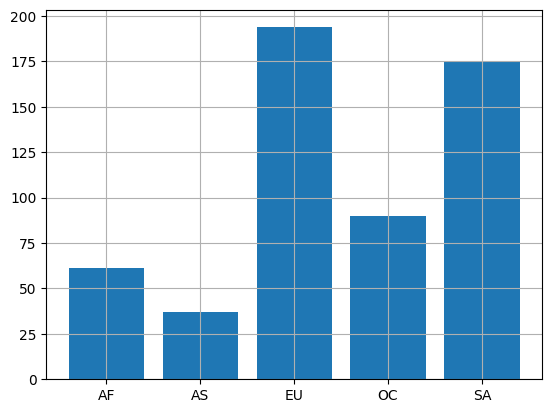

In [50]:
continente = df.groupby('continente') #Se agrupan por continente
plt.bar(continente['porciones_cerveza'].mean().keys(),continente['porciones_cerveza'].mean()) #Se hace la gráfica de los promedios por continente
plt.grid()

Podemos ver que quienes viven en Europa son quienes, en promedio, toman mas cerveza.

## Analizar la columna de vino e imprimir un análisis básico estadístico del consumo.

In [51]:
vino = df.porciones_vino.describe()
vino

count    193.000000
mean      49.450777
std       79.697598
min        0.000000
25%        1.000000
50%        8.000000
75%       59.000000
max      370.000000
Name: porciones_vino, dtype: float64

### Para cada continente imprime los valores medio, mínimo y máximo para el consumo de licor.

In [53]:
licor = continente['porciones_licor'].describe()
licor

count        mean        std   min    25%    50%     75%    max
continente                                                                 
AF           53.0   16.339623  28.102794   0.0   1.00    3.0   19.00  152.0
AS           44.0   60.840909  84.362160   0.0   1.00   16.0   98.00  326.0
EU           45.0  132.555556  77.589115   0.0  81.00  122.0  173.00  373.0
OC           16.0   58.437500  70.504817   0.0  18.00   37.0   65.25  254.0
SA           12.0  114.750000  77.077440  25.0  65.75  108.5  148.75  302.0

### Para cada continente imprime el consumo medio de alcohol para todas la columnas.

In [56]:
mean = continentes.mean()
mean

/tmp/ipykernel_28511/3578954539.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = continentes.mean()


porciones_cerveza  porciones_licor  porciones_vino  \
continente                                                       
AF                  61.471698        16.339623       16.264151   
AS                  37.045455        60.840909        9.068182   
EU                 193.777778       132.555556      142.222222   
OC                  89.687500        58.437500       35.625000   
SA                 175.083333       114.750000       62.416667   

            litros_totales_de_alcohol_puro  
continente                                  
AF                                3.007547  
AS                                2.170455  
EU                                8.617778  
OC                                3.381250  
SA                                6.308333

## 3.3 Visualización
Leer el archivos visulualizacion.txt que se encuentra en la carpeta Data

In [3]:
visual = pd.read_csv('../../../../Documentos/Data/visualizacion.txt')
visual = visual.drop(columns=['Unnamed: 0'])

visual

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

* Realizar el histograma de la columna total_bill.

Text(0, 0.5, 'bill')

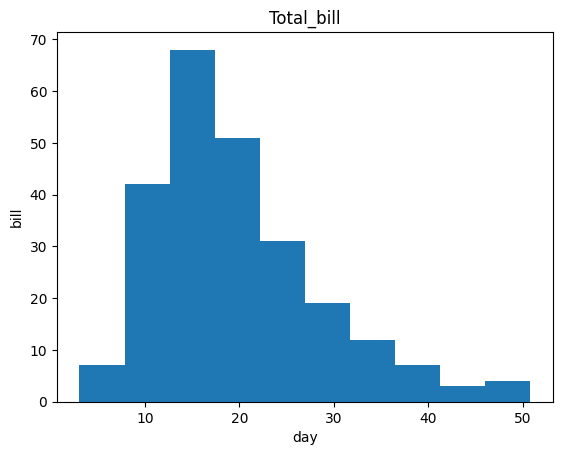

In [95]:
plt.hist(visual["total_bill"])
plt.title("Total_bill")
plt.xlabel("day")
plt.ylabel("bill")

* Crear un scatter plot presentando la realcion entre total_bill y tip.

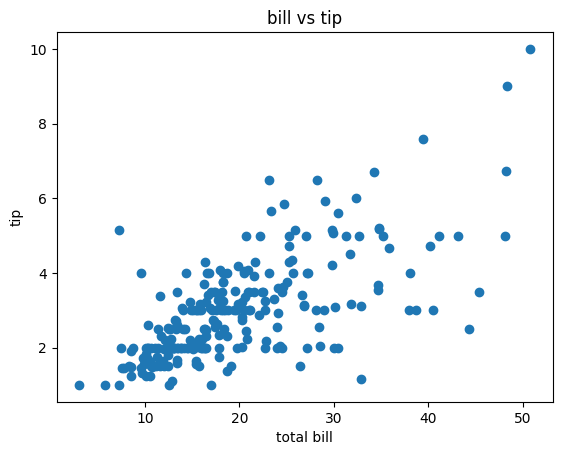

In [98]:
plt.scatter(visual['total_bill'], visual['tip'])
plt.xlabel("total bill")
plt.ylabel("tip")
plt.title("bill vs tip");


* Presentar una relación entre los valores de los days y total_bill.

Text(0, 0.5, 'bill')

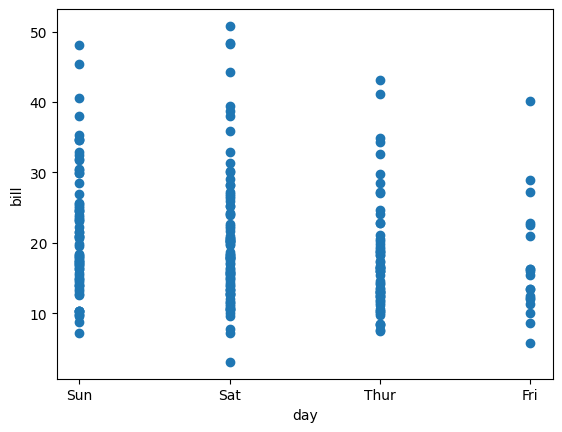

In [99]:
plt.scatter(visual['day'], visual['total_bill'])
plt.xlabel("day")
plt.ylabel("bill")

* Cree un box plot que presente el total_bill por día diferenciando la hora (Cena o Almuerzo).

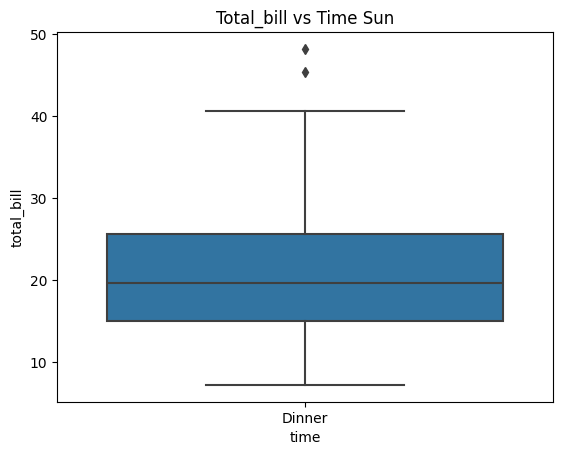

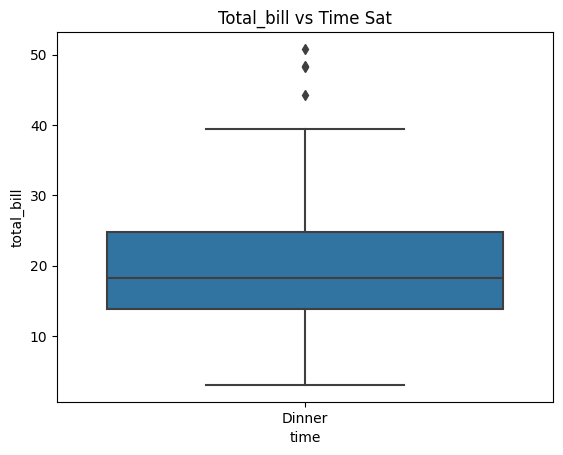

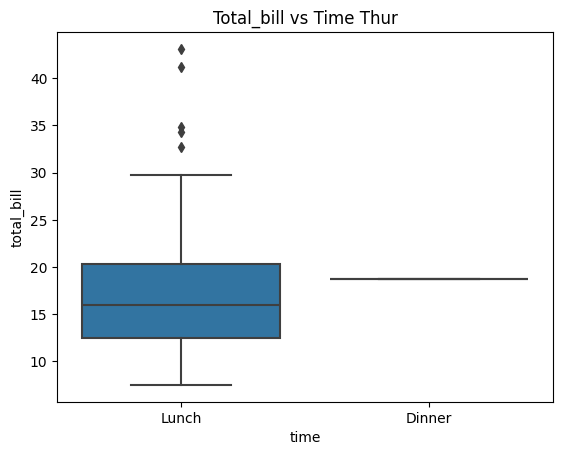

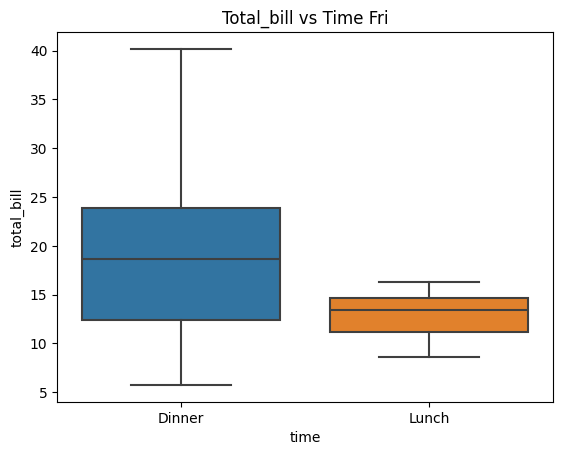

In [8]:

df_dias = visual['day'].unique()

for i in df_dias:

    sb.boxplot(x='time', y='total_bill', data = visual[visual['day'] == i]) #usamos seaborn para hacer los plots
    plt.title(f'Total_bill vs Time {i}')
    plt.show()